In [109]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [111]:
metadata = pd.read_csv("HAM10000_metadata.csv")
metadata.describe(include="all")

,lesion_id,image_id,dx,dx_type,age,sex,localization
count,10015,10015,10015,10015,9958.000000,10015,10015
unique,7470,10015,7,4,NaN,3,15
top,HAM_0000835,ISIC_0030630,nv,histo,NaN,male,back
freq,6,1,6705,5340,NaN,5406,2192
mean,NaN,NaN,NaN,NaN,51.863828,NaN,NaN
std,NaN,NaN,NaN,NaN,16.968614,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,65.000000,NaN,NaN


In [21]:
print(metadata.head(5))

     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


In [22]:
labels = list(metadata.dx.unique())
print(labels)

['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec']


nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


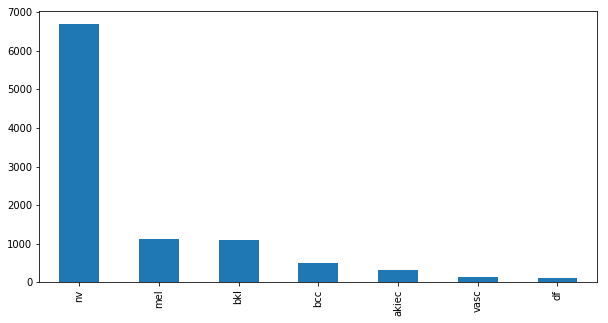

In [23]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
counts = metadata["dx"].value_counts()
print(counts)
counts.plot(kind='bar', ax=ax1)
#metadata["dx"].hist()

In [26]:
# parse out all classes to individual dataframes
nv = metadata[metadata["dx"] == "nv"]
mel = metadata[metadata["dx"] == "mel"]
bkl = metadata[metadata["dx"] == "bkl"]
bcc = metadata[metadata["dx"] == "bcc"]
akiec = metadata[metadata["dx"] == "akiec"]
vasc = metadata[metadata["dx"] == "vasc"]
df = metadata[metadata["dx"] == "df"]
# list out
classes = [nv, mel, bkl, bcc, akiec, vasc, df]

In [89]:
def display(image, title=None):
    fig = plt.figure(figsize=(5, 5))
    #plt.imshow(image, cmap="gray")
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [151]:
def preprocess(_image):
    #_image = cv2.cvtColor(_image, cv2.COLOR_BGR2RGB)
    
    _image = cv2.equalizeHist(_image) 
    #_image = cv2.GaussianBlur(_image, (3,3), 1)
    #_image = cv2.cvtColor(_image, cv2.COLOR_RGB2HSV)
    #H,S,V = cv2.split(_image)
    #_V = cv2.equalizeHist(V) 
    #_image = cv2.merge([H, S, _V])
    #_image = cv2.cvtColor(_image, cv2.COLOR_HSV2RGB)
    
    return _image

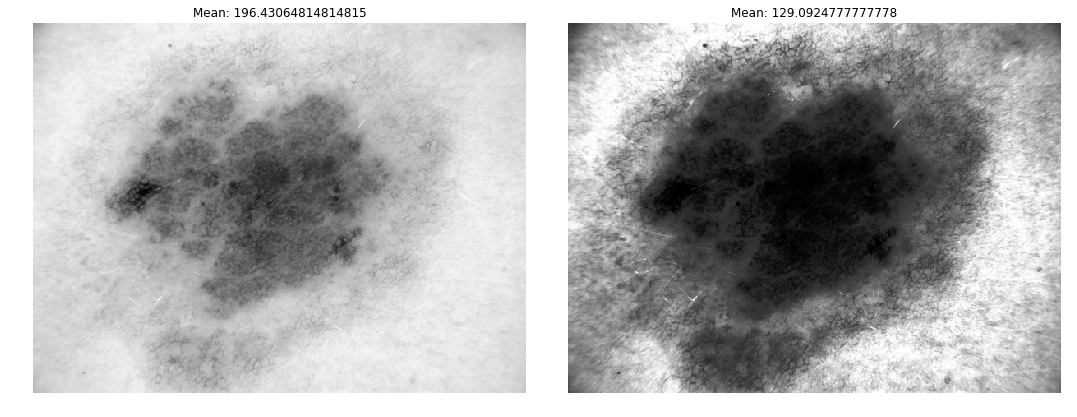

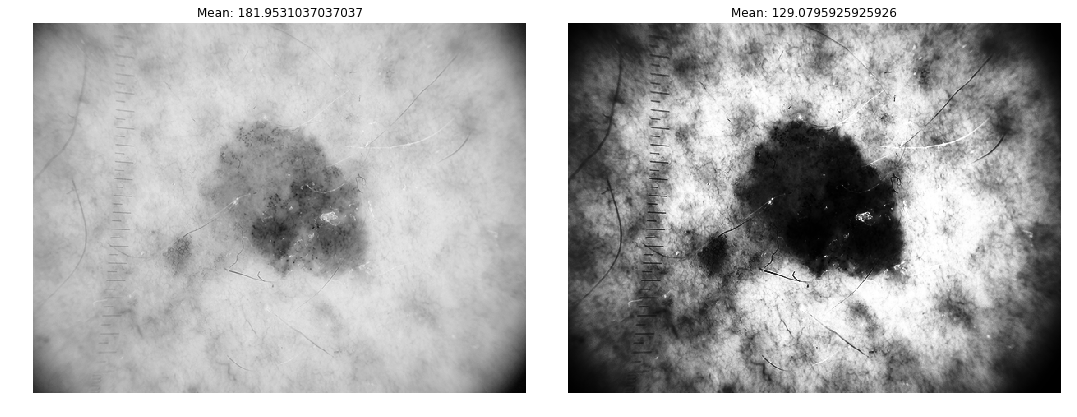

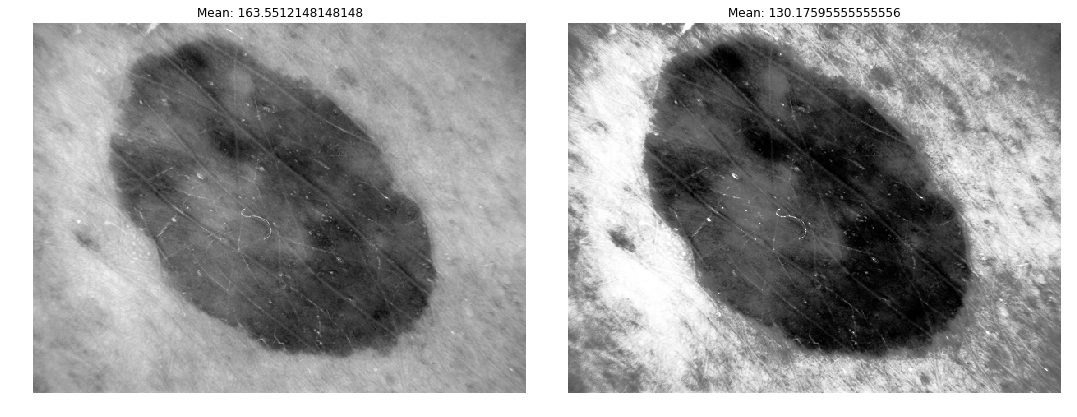

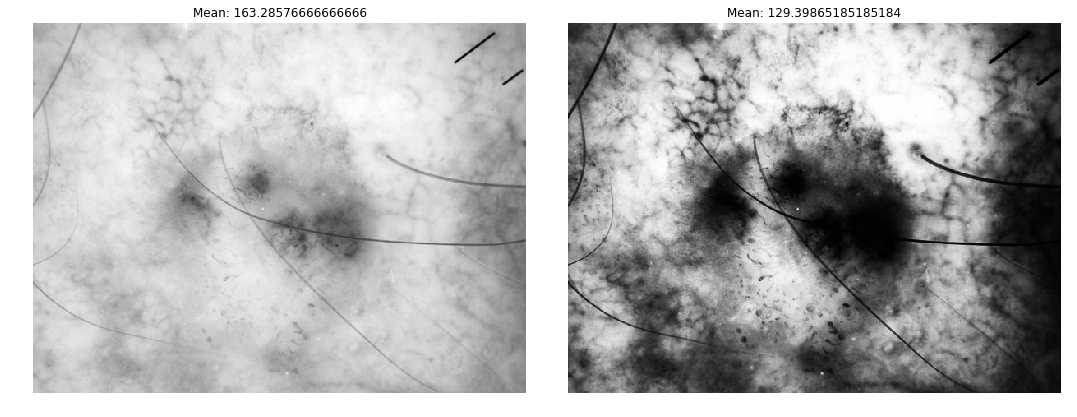

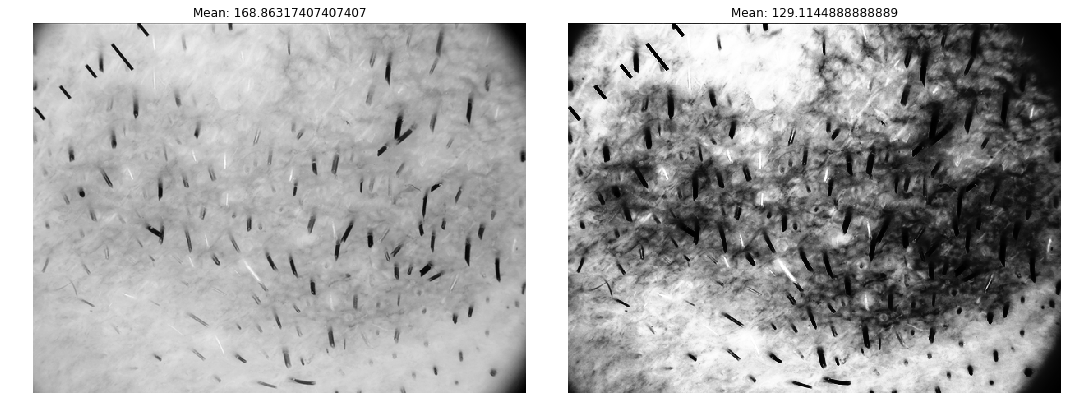

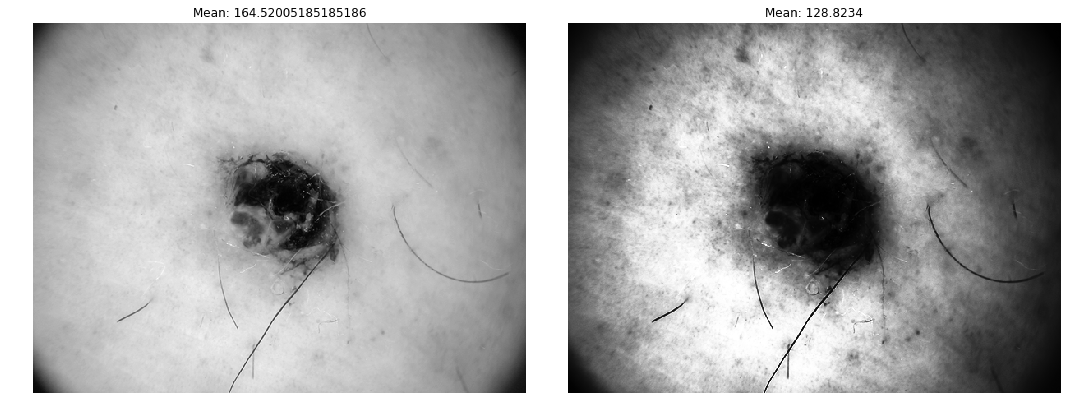

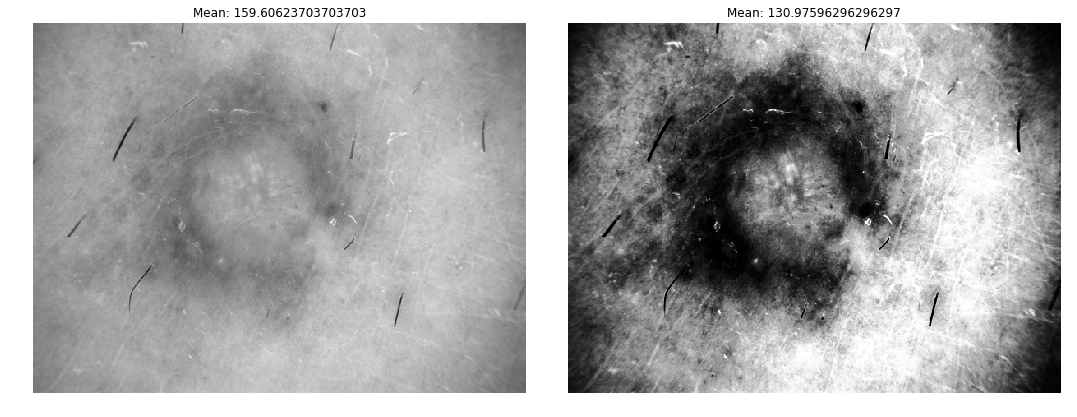

In [153]:
# apply preprocesing and display both side by side for each class
num_images = 2
for _class in classes:
    # plotting
    fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 15), squeeze=False)
    fig.tight_layout()
    row = _class.sample(n=1)
    _id = row["image_id"].to_string(index=False).strip()
    image = cv2.imread("ham10000/{}.jpg".format(_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_preprocessed = preprocess(image)
    for l in range(1):
        for m, img in enumerate([image, image_preprocessed]):
            axes[l][m].imshow(img, cmap="gray")
            axes[l][m].axis("off")
            axes[l][m].set_title("Mean: {}".format(np.mean(img)))